In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#store the data into a dataframe

df = pd.read_csv("employee_churn.csv")

In [3]:
# data preprocessing
#print the first 5 rows 

df.head()

,status,avg_monthly_hrs,department,filed_complaint,last_evaluation,no_of_projects,recently_promoted,salary,satisfaction,tenure
0,Left,221,engineering,NaN,0.932868,4,NaN,low,0.829896,5.0
1,Employed,232,support,NaN,NaN,3,NaN,low,0.834544,2.0
2,Employed,184,sales,NaN,0.788830,3,NaN,medium,0.834988,3.0
3,Employed,206,sales,NaN,0.575688,4,NaN,low,0.424764,2.0
4,Employed,249,sales,NaN,0.845217,3,NaN,low,0.779043,3.0


In [4]:
#Get the number of rows and columns

df.shape

(14249, 10)

In [5]:
#Get the data types

df.dtypes

status                object
avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
no_of_projects         int64
recently_promoted    float64
salary                object
satisfaction         float64
tenure               float64
dtype: object

In [6]:
# getting an idea of the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             14249 non-null  object 
 1   avg_monthly_hrs    14249 non-null  int64  
 2   department         13602 non-null  object 
 3   filed_complaint    2058 non-null   float64
 4   last_evaluation    12717 non-null  float64
 5   no_of_projects     14249 non-null  int64  
 6   recently_promoted  300 non-null    float64
 7   salary             14249 non-null  object 
 8   satisfaction       14068 non-null  float64
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [7]:
#Check for missing or null values

df.isnull().values.any()

True

In [8]:
df.isnull().sum()

status                   0
avg_monthly_hrs          0
department             647
filed_complaint      12191
last_evaluation       1532
no_of_projects           0
recently_promoted    13949
salary                   0
satisfaction           181
tenure                 181
dtype: int64

In [9]:
#Handling missing data -- each column is considered based on its purpose and
#the missing data mechanisms

#the numeric columns will be filled with zero, mode or mean while the categorical column 
#(department) will be assigned "missing" feature


df["department"].fillna("missing", inplace=True)
df["filed_complaint"].fillna(0, inplace=True)
df["last_evaluation"].fillna(0, inplace=True)
df["recently_promoted"].fillna(0, inplace=True)


In [10]:
#dropping the missing rows of satisfaction and tenure, it was observed that they have 
#the same missing count so it is assumed that they are new

df.dropna(inplace=True)

In [11]:
# check for duplicates and have only unique records ------ to prevent overfitting   

#there are no duplicates

df.duplicated().any()

False

In [12]:
#Viewing the column department to get the values

df["department"].unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'procurement', 'finance', 'management', 'missing',
       'information_technology', 'admin'], dtype=object)

In [13]:
#merging IT and information_technology since they refer to thesame department

df["department"].replace("information_technology", "IT", inplace=True)

In [14]:
df.columns.values

array(['status', 'avg_monthly_hrs', 'department', 'filed_complaint',
       'last_evaluation', 'no_of_projects', 'recently_promoted', 'salary',
       'satisfaction', 'tenure'], dtype=object)

In [15]:
df.rename(columns={"status": "churn"}, inplace=True)


In [16]:
#This is the cleaned data I will work with

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn              14068 non-null  object 
 1   avg_monthly_hrs    14068 non-null  int64  
 2   department         14068 non-null  object 
 3   filed_complaint    14068 non-null  float64
 4   last_evaluation    14068 non-null  float64
 5   no_of_projects     14068 non-null  int64  
 6   recently_promoted  14068 non-null  float64
 7   salary             14068 non-null  object 
 8   satisfaction       14068 non-null  float64
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.2+ MB


In [17]:
#getting the number of data points for analysis

df.shape

(14068, 10)

In [18]:
#viewing some summary statistics

df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,no_of_projects,recently_promoted,satisfaction,tenure
count,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000
mean,201.083736,0.143944,0.649479,3.801038,0.021325,0.621295,3.497228
std,49.959962,0.351045,0.268123,1.236058,0.144470,0.250469,1.460917
min,96.000000,0.000000,0.000000,2.000000,0.000000,0.040058,2.000000
25%,156.000000,0.000000,0.525727,3.000000,0.000000,0.450390,3.000000
50%,200.000000,0.000000,0.688023,4.000000,0.000000,0.652527,3.000000
75%,245.000000,0.000000,0.858129,5.000000,0.000000,0.824951,4.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000


In [19]:
df.corr()

,avg_monthly_hrs,filed_complaint,last_evaluation,no_of_projects,recently_promoted,satisfaction,tenure
avg_monthly_hrs,1.000000,-0.007238,0.253242,0.418882,-0.001203,-0.019622,0.124954
filed_complaint,-0.007238,1.000000,-0.020216,-0.003293,0.043196,0.056338,0.007224
last_evaluation,0.253242,-0.020216,1.000000,0.282751,-0.009055,0.010150,0.224882
no_of_projects,0.418882,-0.003293,0.282751,1.000000,-0.004901,-0.143514,0.192653
recently_promoted,-0.001203,0.043196,-0.009055,-0.004901,1.000000,0.025797,0.068991
satisfaction,-0.019622,0.056338,0.010150,-0.143514,0.025797,1.000000,-0.097301
tenure,0.124954,0.007224,0.224882,0.192653,0.068991,-0.097301,1.000000


<AxesSubplot:>

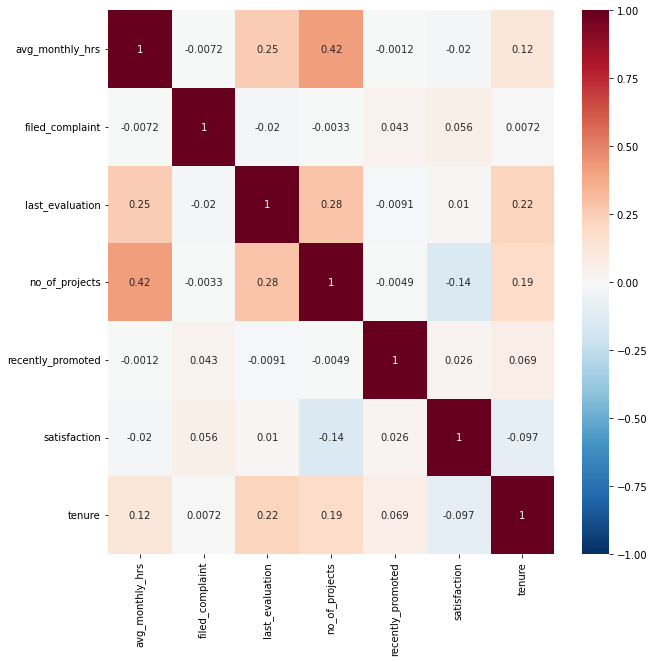

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),
 annot=True,
 cmap='RdBu_r',
 vmin=-1,
 vmax=1)


In [21]:
num_col=[]
for i in df.columns:
    if df[i].dtypes!=object: 
        print(i, df[i].unique())
        num_col.append(i)
        
     

avg_monthly_hrs [221 232 184 206 249 140 121 150 215 269 147 188 191 290 253 258 151 252
 276 154 259 136 176 231 109 130 163 268 107 156 234 127 282 133 270 132
 126 139 308 274 278 185 263 260 224 135 245 203 235 187 165 146 159 198
 275 141 173 230 168 183 246 209 143 212 186 162 158 283 113 214 181 251
 219 170 207 241 167 161 271 310 257 229 211 248 266 103 160 116 194 200
 213 148 250 196 265 262 175 254 189 104 195 255 281 155 208 280 137 242
 153 233 179 239 172 201 222 228 124 129 142 238 152 111 180 237 288 199
 256 305 138 134 166 291 273 240 236 171 182 225 164 149 272 193 120 145
 243 223 261 298 227 204 267 115 226 304 177 244 287 192 178 289 197 128
 247 131 220 264 217 118 218 277 157 285 210 106 174 309 284 114 202 190
 144 125 286 117 169 100 279 122 307 306 292 294 216  98 105 108 300 303
 205 101 301 297 119 102 295 123 296 293 112  97 299  96 302 110  99]
filed_complaint [0. 1.]
last_evaluation [0.93286764 0.         0.78882984 ... 0.8476229  0.75718351 0.57874205]

In [22]:
#viewing the categorical columns


for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + " : " + str(df[column].unique()))
        print(df[column].value_counts())
        print("______________________________________________________")

churn : ['Left' 'Employed']
Employed    10701
Left         3367
Name: churn, dtype: int64
______________________________________________________
department : ['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'procurement'
 'finance' 'management' 'missing' 'admin']
sales          3944
engineering    2619
support        2122
IT             1374
product         860
marketing       819
finance         728
missing         647
management      603
procurement     176
admin           176
Name: department, dtype: int64
______________________________________________________
salary : ['low' 'medium' 'high']
low       6871
medium    6055
high      1142
Name: salary, dtype: int64
______________________________________________________


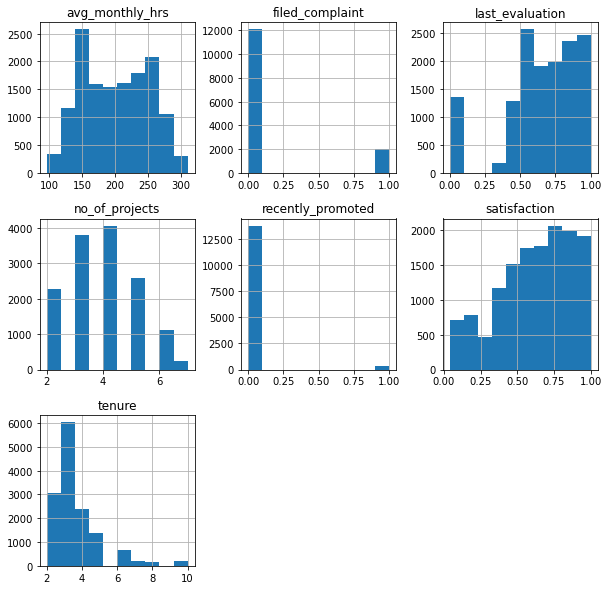

In [23]:
#Visualising the numerical data

df.hist(figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='churn', ylabel='count'>

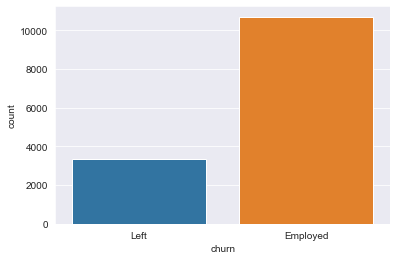

In [24]:
sns.set_style("darkgrid")
sns.countplot(x ="churn", data = df)

In [25]:
df["churn"].value_counts()

Employed    10701
Left         3367
Name: churn, dtype: int64

In [26]:
#the data is imbalanced, ratio 76:24
#so we analyse the data with the other featres while taking the
#target values seperately to get some insights


100*df["churn"].value_counts()/len(df["churn"])

Employed    76.06625
Left        23.93375
Name: churn, dtype: float64

<AxesSubplot:title={'center':'avg_monthly_hrs'}, xlabel='churn'>

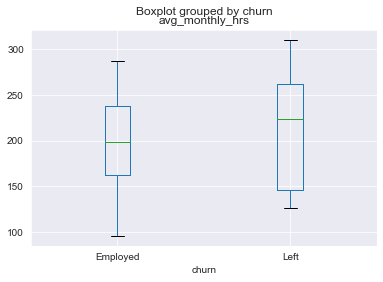

In [27]:
#visalising some relationships

df.boxplot(column='avg_monthly_hrs', by='churn')

<AxesSubplot:title={'center':'satisfaction'}, xlabel='churn'>

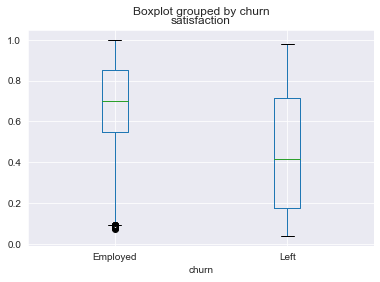

In [28]:
df.boxplot(column='satisfaction', by='churn')

<AxesSubplot:title={'center':'no_of_projects'}, xlabel='churn'>

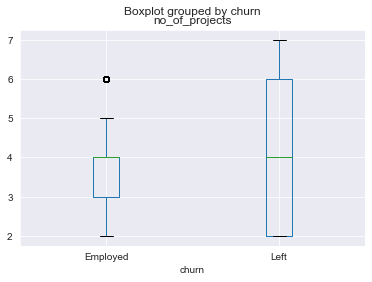

In [29]:
df.boxplot(column='no_of_projects', by='churn')

<AxesSubplot:title={'center':'last_evaluation'}, xlabel='churn'>

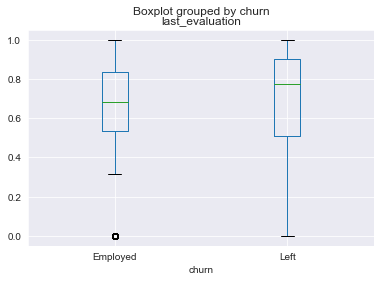

In [30]:
df.boxplot(column='last_evaluation', by='churn')

<AxesSubplot:xlabel='no_of_projects', ylabel='avg_monthly_hrs'>

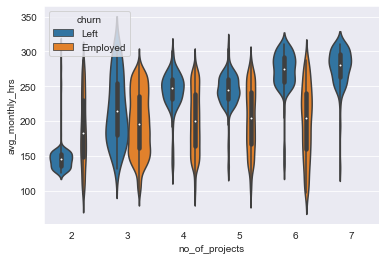

In [31]:
sns.violinplot(x = 'no_of_projects', y = 'avg_monthly_hrs', hue = 'churn', data = df)

<AxesSubplot:xlabel='satisfaction', ylabel='salary'>

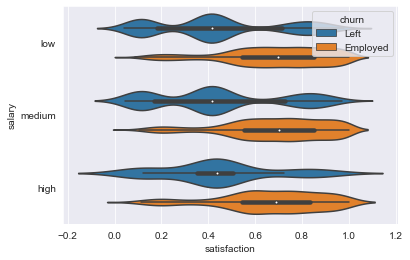

In [32]:
sns.violinplot(x = 'satisfaction', y = 'salary', hue = 'churn', data = df)

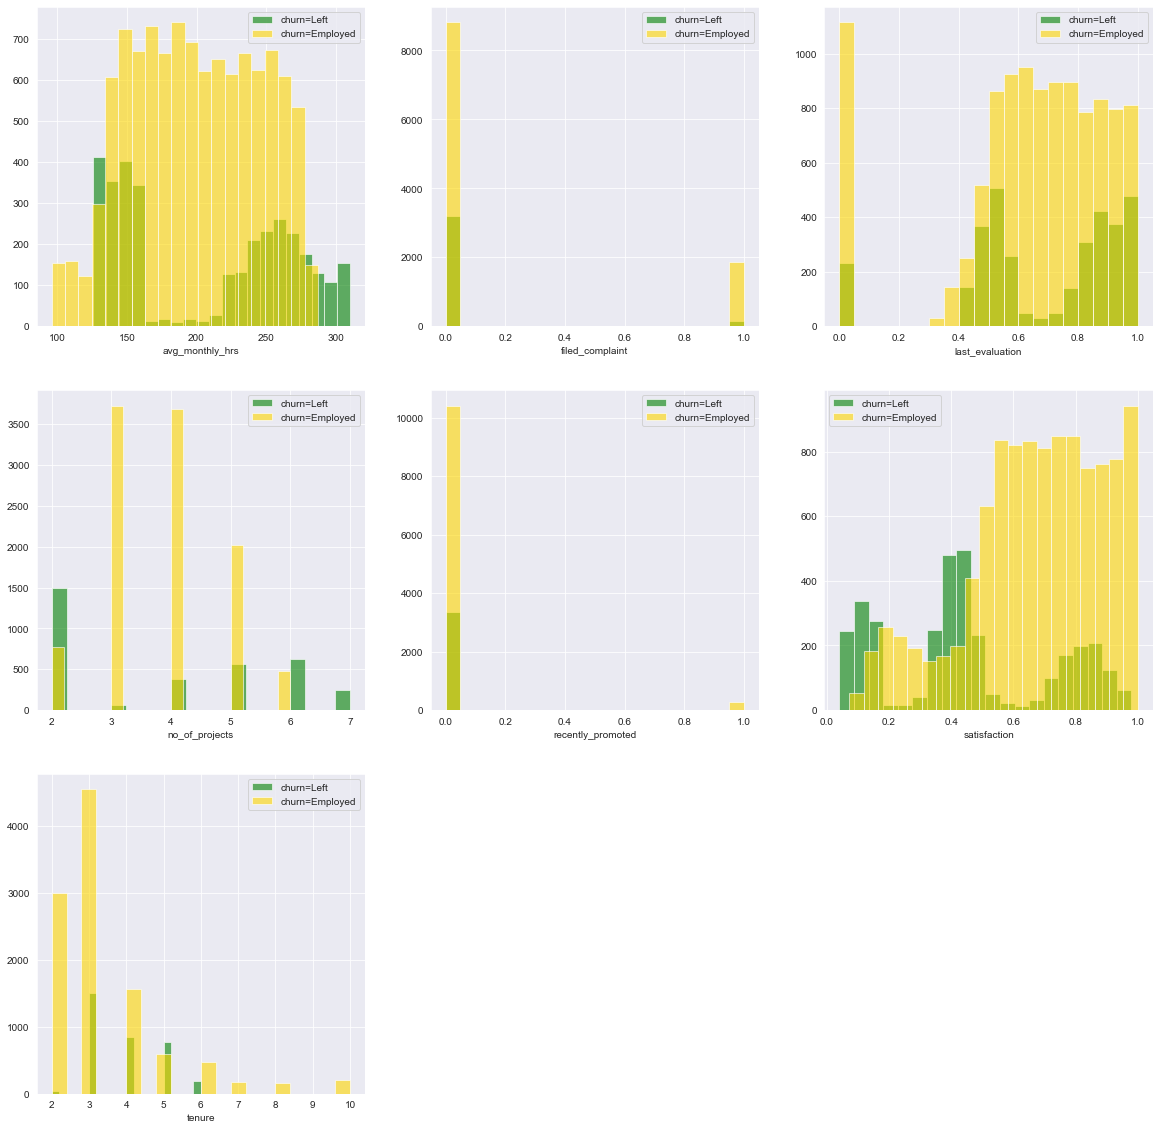

In [33]:
plt.figure(figsize=(20,20))
for i, column in enumerate(num_col,1):
    plt.subplot(3,3,i)
    df[df['churn']=='Left'][column].hist(bins=20, stacked=True,color='green',label="churn=Left",alpha=0.6)
    df[df['churn']=='Employed'][column].hist(bins=20,color='gold',label="churn=Employed",alpha=0.6)
    plt.xlabel(column)
    plt.legend()

   


In [34]:
df["tenure"].value_counts()


3.0     6048
2.0     3046
4.0     2400
5.0     1373
6.0      664
10.0     200
7.0      182
8.0      155
Name: tenure, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn              14068 non-null  object 
 1   avg_monthly_hrs    14068 non-null  int64  
 2   department         14068 non-null  object 
 3   filed_complaint    14068 non-null  float64
 4   last_evaluation    14068 non-null  float64
 5   no_of_projects     14068 non-null  int64  
 6   recently_promoted  14068 non-null  float64
 7   salary             14068 non-null  object 
 8   satisfaction       14068 non-null  float64
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.2+ MB


In [36]:
dept_dummies = pd.get_dummies(df['department'], prefix='department')

In [37]:
salary_dummies = pd.get_dummies(df['salary'], prefix='salary')

In [38]:
churn_target = df['churn'].map({'Left':0,'Employed':1})

In [39]:
df_new2 = pd.concat([df,dept_dummies],axis=1)

In [40]:
df_new2 = pd.concat([df_new2,salary_dummies],axis=1)

In [41]:
df_new2

,churn,avg_monthly_hrs,department,filed_complaint,last_evaluation,no_of_projects,recently_promoted,salary,satisfaction,tenure,...,department_management,department_marketing,department_missing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,Left,221,engineering,0.0,0.932868,4,0.0,low,0.829896,5.0,...,0,0,0,0,0,0,0,0,1,0
1,Employed,232,support,0.0,0.000000,3,0.0,low,0.834544,2.0,...,0,0,0,0,0,0,1,0,1,0
2,Employed,184,sales,0.0,0.788830,3,0.0,medium,0.834988,3.0,...,0,0,0,0,0,1,0,0,0,1
3,Employed,206,sales,0.0,0.575688,4,0.0,low,0.424764,2.0,...,0,0,0,0,0,1,0,0,1,0
4,Employed,249,sales,0.0,0.845217,3,0.0,low,0.779043,3.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14244,Employed,178,IT,0.0,0.735865,5,0.0,low,0.263282,5.0,...,0,0,0,0,0,0,0,0,1,0
14245,Employed,257,sales,0.0,0.638604,3,0.0,low,0.868209,2.0,...,0,0,0,0,0,1,0,0,1,0
14246,Left,232,finance,1.0,0.847623,5,0.0,medium,0.898917,5.0,...,0,0,0,0,0,0,0,0,0,1
14247,Employed,130,IT,0.0,0.757184,4,0.0,medium,0.641304,3.0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df_new2.drop(['churn','salary','department'],axis=1,inplace=True)

In [43]:
df_new2 = pd.concat([df_new2,churn_target],axis=1)

In [44]:
df_new2

,avg_monthly_hrs,filed_complaint,last_evaluation,no_of_projects,recently_promoted,satisfaction,tenure,department_IT,department_admin,department_engineering,...,department_marketing,department_missing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium,churn
0,221,0.0,0.932868,4,0.0,0.829896,5.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,232,0.0,0.000000,3,0.0,0.834544,2.0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,184,0.0,0.788830,3,0.0,0.834988,3.0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,206,0.0,0.575688,4,0.0,0.424764,2.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,249,0.0,0.845217,3,0.0,0.779043,3.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14244,178,0.0,0.735865,5,0.0,0.263282,5.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
14245,257,0.0,0.638604,3,0.0,0.868209,2.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
14246,232,1.0,0.847623,5,0.0,0.898917,5.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14247,130,0.0,0.757184,4,0.0,0.641304,3.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [45]:
df_new2.corr()

,avg_monthly_hrs,filed_complaint,last_evaluation,no_of_projects,recently_promoted,satisfaction,tenure,department_IT,department_admin,department_engineering,...,department_marketing,department_missing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium,churn
avg_monthly_hrs,1.000000,-0.007238,0.253242,0.418882,-0.001203,-0.019622,0.124954,0.007664,0.000426,0.012153,...,-0.007065,-0.011603,-0.002301,-0.005577,-0.002614,-0.000913,-0.005630,0.002490,0.000592,-0.069282
filed_complaint,-0.007238,1.000000,-0.020216,-0.003293,0.043196,0.056338,0.007224,-0.002577,-0.015184,-0.008318,...,0.011338,-0.015595,0.013966,0.005248,-0.003027,0.013326,0.013062,-0.008927,0.001808,0.156927
last_evaluation,0.253242,-0.020216,1.000000,0.282751,-0.009055,0.010150,0.224882,-0.005528,-0.005870,0.010276,...,-0.007230,0.000605,-0.010182,-0.006515,-0.005317,0.004453,-0.025919,-0.012329,0.026743,-0.063693
no_of_projects,0.418882,-0.003293,0.282751,1.000000,-0.004901,-0.143514,0.192653,0.003172,0.008805,0.025129,...,-0.022854,-0.018195,0.006218,0.003387,-0.014890,0.001157,-0.008378,-0.002293,0.006936,-0.021283
recently_promoted,-0.001203,0.043196,-0.009055,-0.004901,1.000000,0.025797,0.068991,-0.036962,0.005519,-0.037734,...,0.047354,0.000476,0.032081,-0.037667,0.014125,-0.037467,0.080438,-0.080248,0.036647,0.062043
satisfaction,-0.019622,0.056338,0.010150,-0.143514,0.025797,1.000000,-0.097301,0.008493,-0.004425,-0.006536,...,0.007769,-0.014001,0.003664,0.007619,0.003736,0.009469,0.031144,-0.051794,0.035111,0.389232
tenure,0.124954,0.007224,0.224882,0.192653,0.068991,-0.097301,1.000000,-0.009374,-0.009855,-0.030782,...,0.012005,-0.019445,-0.017297,-0.001750,0.012017,-0.029519,0.037623,-0.041707,0.021353,-0.142759
department_IT,0.007664,-0.002577,-0.005528,0.003172,-0.036962,0.008493,-0.009374,1.000000,-0.037031,-0.157354,...,-0.081798,-0.072236,-0.037031,-0.083951,-0.205346,-0.138661,-0.023267,0.000920,0.011905,0.015629
department_admin,0.000426,-0.015184,-0.005870,0.008805,0.005519,-0.004425,-0.009855,-0.037031,1.000000,-0.053834,...,-0.027985,-0.024713,-0.012669,-0.028721,-0.070253,-0.047439,-0.005356,-0.003788,0.006778,0.010677
department_engineering,0.012153,-0.008318,0.010276,0.025129,-0.037734,-0.006536,-0.030782,-0.157354,-0.053834,1.000000,...,-0.118914,-0.105013,-0.053834,-0.122044,-0.298522,-0.201579,-0.015783,0.017845,-0.009310,-0.017623


In [46]:
df_new2.columns.to_list()

['avg_monthly_hrs',
 'filed_complaint',
 'last_evaluation',
 'no_of_projects',
 'recently_promoted',
 'satisfaction',
 'tenure',
 'department_IT',
 'department_admin',
 'department_engineering',
 'department_finance',
 'department_management',
 'department_marketing',
 'department_missing',
 'department_procurement',
 'department_product',
 'department_sales',
 'department_support',
 'salary_high',
 'salary_low',
 'salary_medium',
 'churn']

<AxesSubplot:>

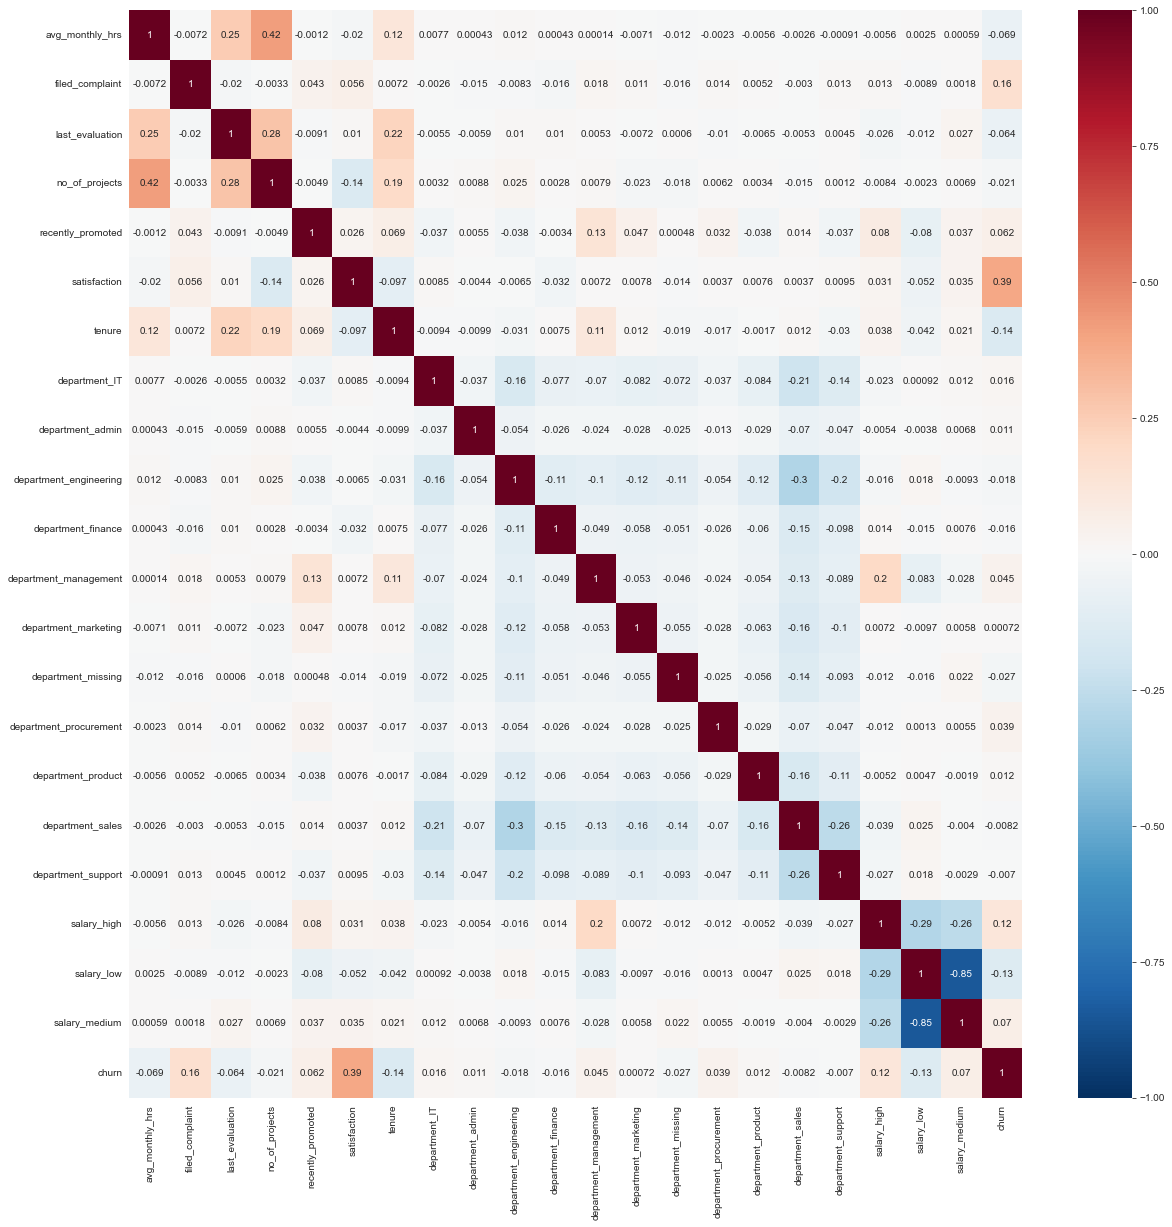

In [47]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_new2.corr(),
 annot=True,
 cmap='RdBu_r',
 vmin=-1,
 vmax=1)


In [48]:
#y = pd.DataFrame(churn_target)

In [49]:
#y

In [50]:
df_new2.drop(['churn'],axis=1,inplace=True)

In [51]:
df_new2

,avg_monthly_hrs,filed_complaint,last_evaluation,no_of_projects,recently_promoted,satisfaction,tenure,department_IT,department_admin,department_engineering,...,department_management,department_marketing,department_missing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,5.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,2.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,2.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,3.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14244,178,0.0,0.735865,5,0.0,0.263282,5.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
14245,257,0.0,0.638604,3,0.0,0.868209,2.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14246,232,1.0,0.847623,5,0.0,0.898917,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14247,130,0.0,0.757184,4,0.0,0.641304,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

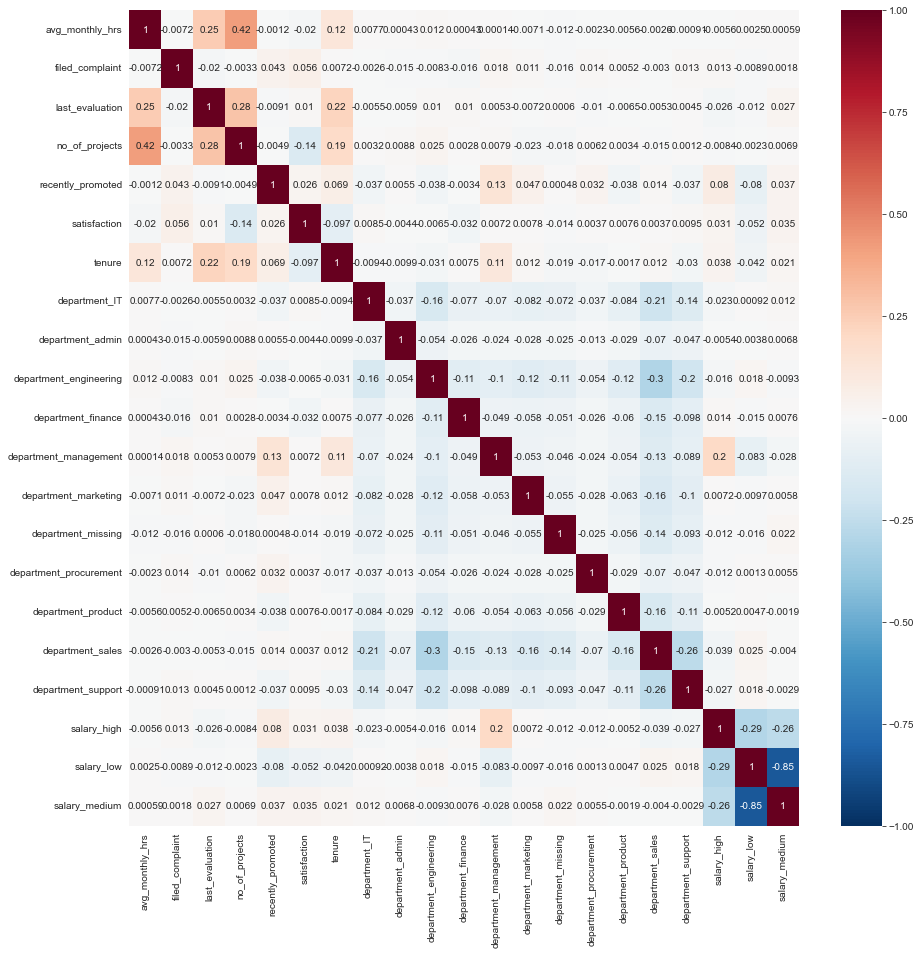

In [52]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_new2.corr(),
 annot=True,
 cmap='RdBu_r',
 vmin=-1,
 vmax=1)



In [53]:
churn_target

0        0
1        1
2        1
3        1
4        1
        ..
14244    1
14245    1
14246    0
14247    1
14248    1
Name: churn, Length: 14068, dtype: int64

In [54]:
#sns.scatterplot(x = "satisfaction", y = y, data = df)

# DT

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [56]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_new2, churn_target, test_size=0.2, random_state=42)

# Create decision tree classifier object
clf_dt = DecisionTreeClassifier()

# Train model
clf_dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = clf_dt.predict(X_test)

# Evaluate model performance
print("Decision Tree Model Performance:")
print("Accuracy_Train:",clf_dt.score(X_train,y_train))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

Decision Tree Model Performance:
Accuracy_Train: 1.0
Accuracy: 0.9584221748400853
Precision: 0.9766464269033162
Recall: 0.968952734012975
F1 Score: 0.9727843684577809


In [57]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_dt)
print('Confusion_matrix :\n{}'.format(confusion))

Confusion_matrix :
[[ 606   50]
 [  67 2091]]


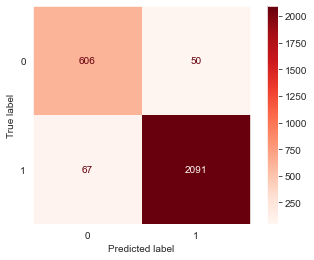

In [58]:
#to draw the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred_dt, labels=clf_dt.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,  
                           display_labels=clf_dt.classes_)
disp.plot( cmap=plt.cm.Reds)
plt.grid(False)
plt.show()

In [59]:
#from sklearn.linear_model import LogisticRegression

#classifier = LogisticRegression()
#y_score = classifier.fit(X_train,y_train).predict_proba(X_test)

In [60]:
# Visualize the decision tree

from sklearn.tree import plot_tree



#tree.plot_tree(clf_dt,feature_names=df_new2.columns.to_list(), filled=True);
#fig.savefig("imagename.png")

plt.figure(figsize=(40,40),dpi=400)
plot_tree(decision_tree=clf_dt, max_depth=3, class_names=("Left","Employed"), feature_names=df_new2.columns.to_list());


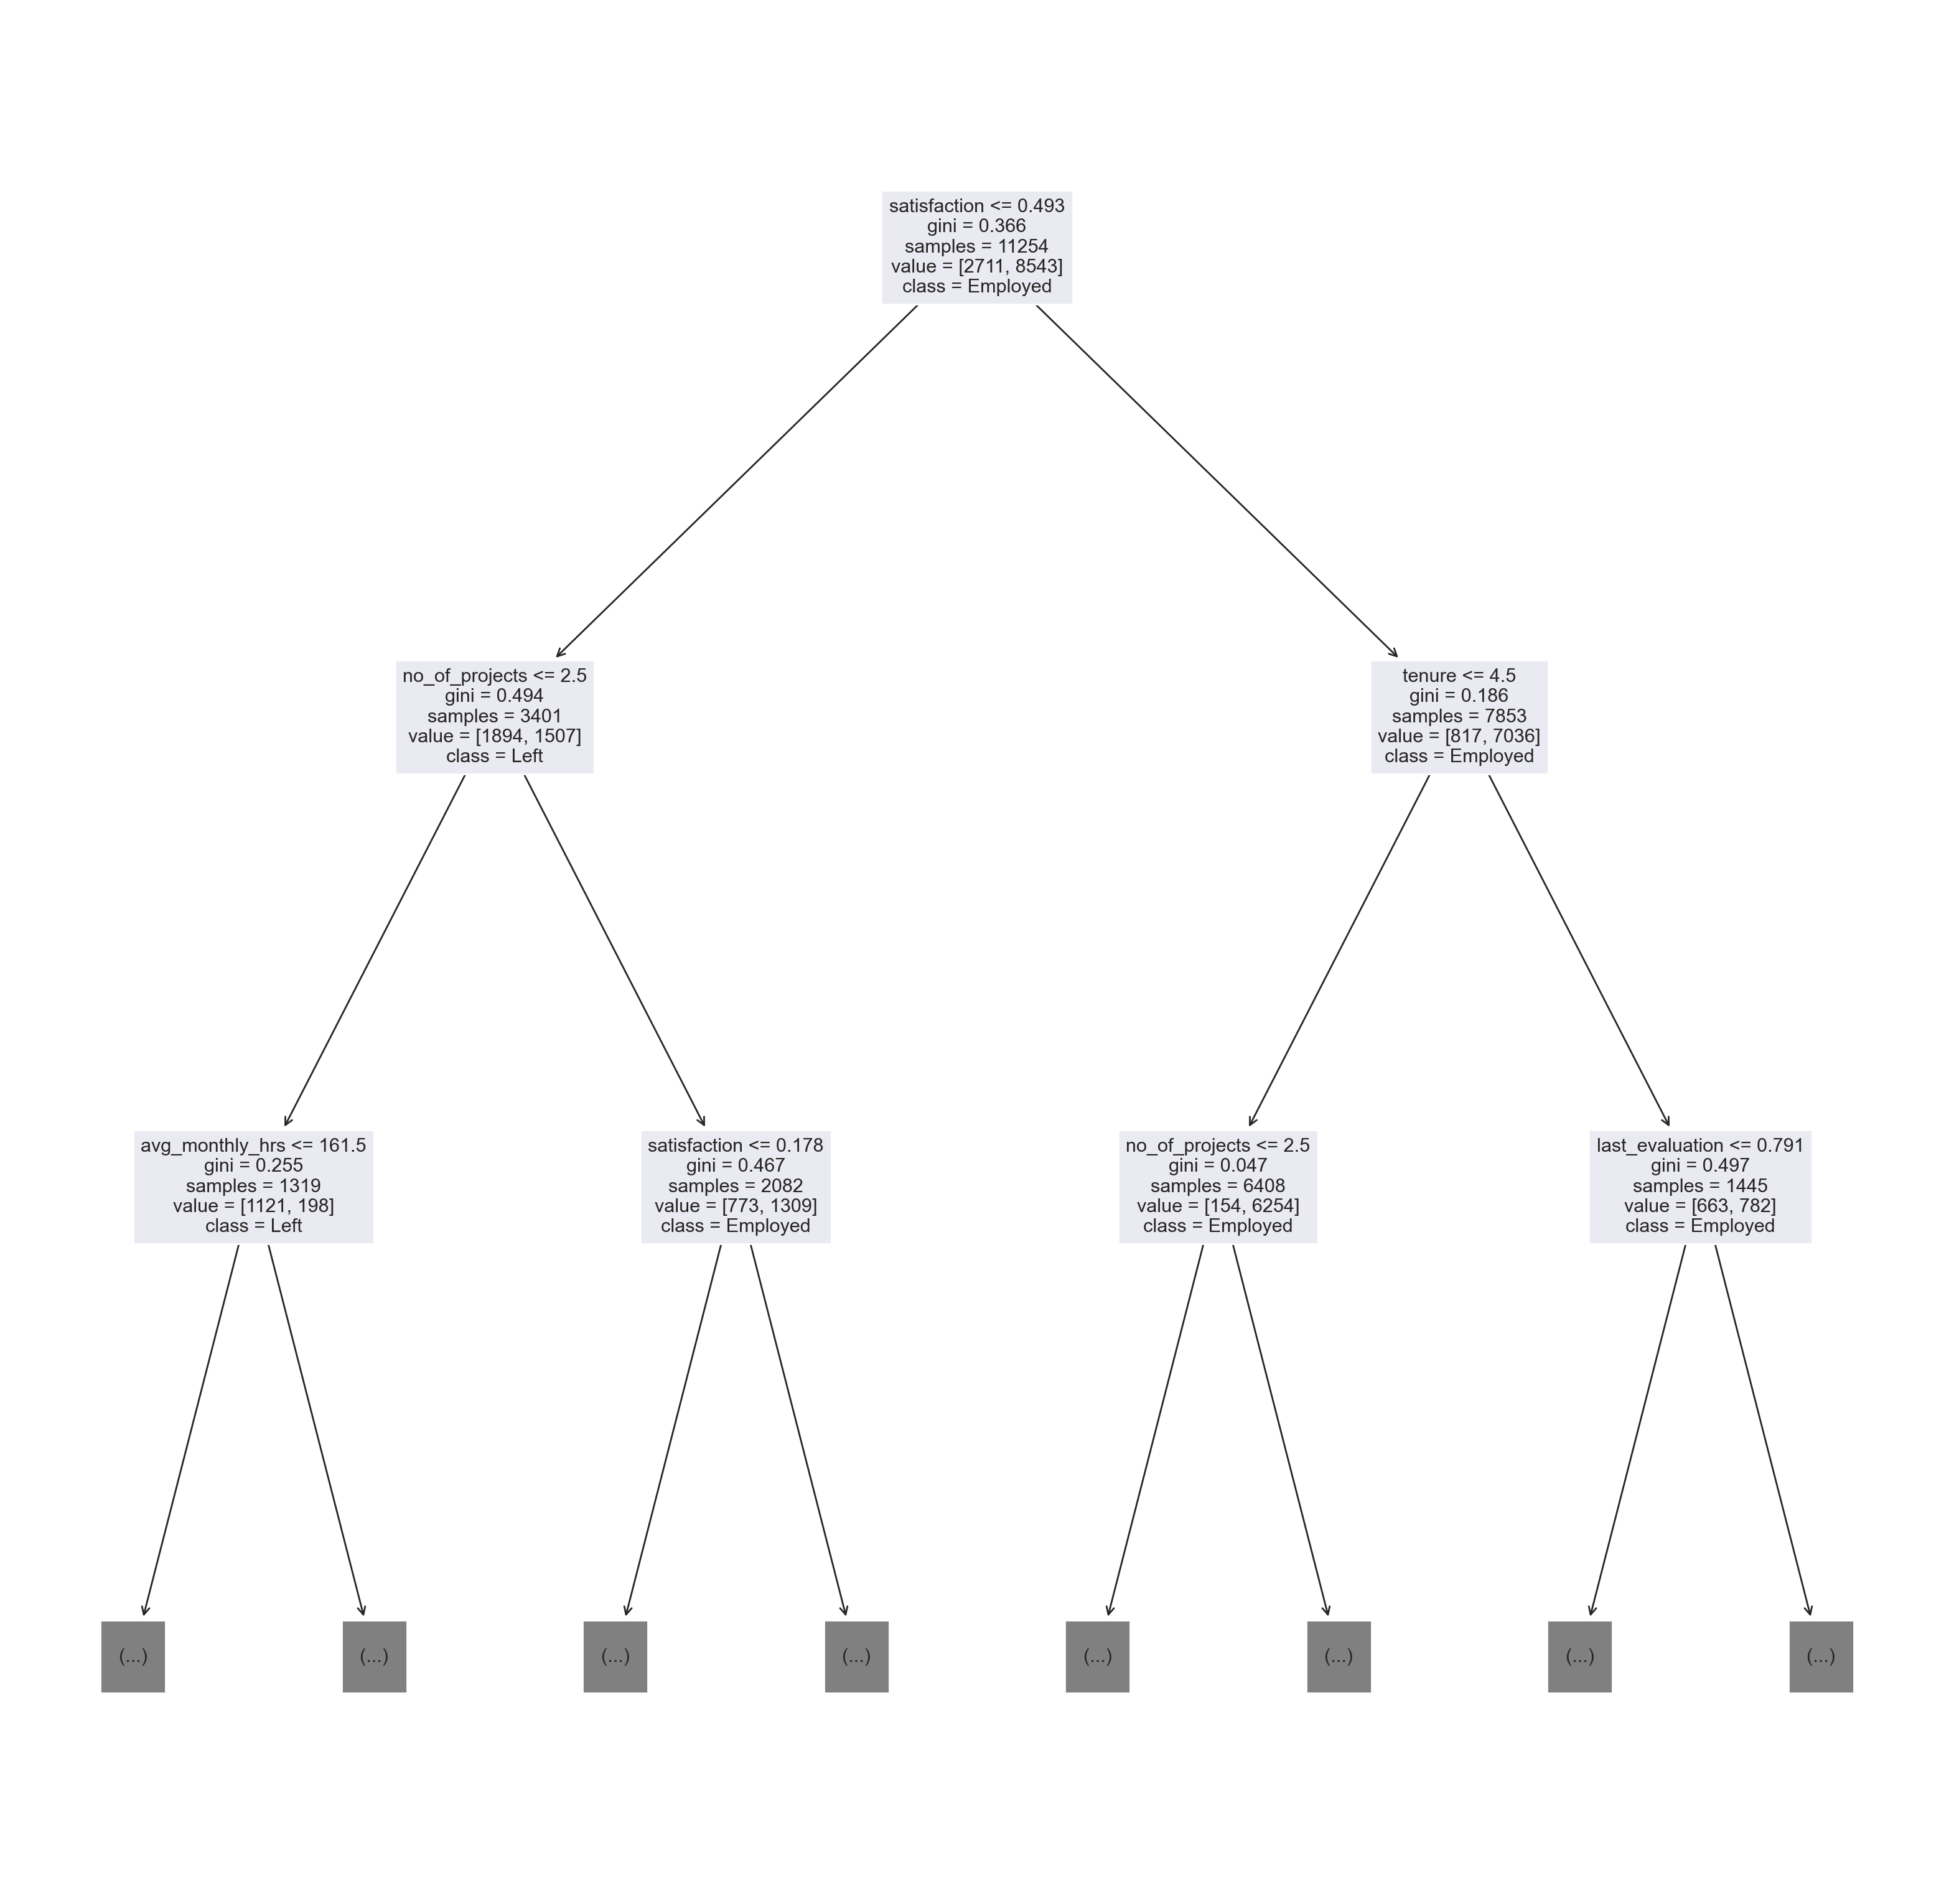

In [61]:
# Visualize the decision tree

from sklearn.tree import plot_tree



plt.figure(figsize=(20,20),dpi=200)
plot_tree(decision_tree=clf_dt, max_depth=2, class_names=("Left","Employed"), feature_names=df_new2.columns.to_list());



In [62]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred_dt = clf_dt.predict(X_test)
target_names = ("Left","Employed")
print(classification_report(y_true, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.90      0.92      0.91       656
    Employed       0.98      0.97      0.97      2158

    accuracy                           0.96      2814
   macro avg       0.94      0.95      0.94      2814
weighted avg       0.96      0.96      0.96      2814



# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:

# Create KNN classifier object
clf_knn = KNeighborsClassifier(n_neighbors=3)

# Train model
clf_knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = clf_knn.predict(X_test)

# Evaluate model performance
print("KNN Model Performance:")
print("Accuracy_Train:",clf_knn.score(X_train,y_train))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))



KNN Model Performance:
Accuracy_Train: 0.9665007997156566
Accuracy: 0.9395877754086709
Precision: 0.9797297297297297
Recall: 0.9406858202038925
F1 Score: 0.9598108747044917


In [65]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_knn)
print('Confusion_matrix :\n{}'.format(confusion))

Confusion_matrix :
[[ 614   42]
 [ 128 2030]]


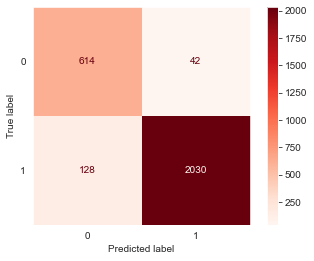

In [66]:
#to draw the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred_knn, labels=clf_knn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,  
                           display_labels=clf_knn.classes_)
disp.plot( cmap=plt.cm.Reds)
plt.grid(False)
plt.show()

In [67]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred_knn = clf_knn.predict(X_test)
target_names = ("Left","Employed")
print(classification_report(y_true, y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.83      0.94      0.88       656
    Employed       0.98      0.94      0.96      2158

    accuracy                           0.94      2814
   macro avg       0.90      0.94      0.92      2814
weighted avg       0.94      0.94      0.94      2814



In [68]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc_X = StandardScaler()

# Fit and transform the training data using the StandardScaler object
scaled_X_train = sc_X.fit_transform(X_train)

# Transform the test data using the StandardScaler object
scaled_X_test = sc_X.transform(X_test)

# Create KNN classifier object
clf_knn = KNeighborsClassifier(n_neighbors=3)




# Fit the model to the standardized trdf_new2aining data and target variable
clf_knn.fit(scaled_X_train,y_train)


# Use the knn_model to predict the target variable of the standardized test data
y_pred_knn_scaled = clf_knn.predict(scaled_X_test)



# Evaluate model performance
print("KNN scaled Model Performance:")
print("Accuracy_Train:",clf_knn.score(scaled_X_train,y_train))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_scaled))
print("Precision:", precision_score(y_test, y_pred_knn_scaled))
print("Recall:", recall_score(y_test, y_pred_knn_scaled))
print("F1 Score:", f1_score(y_test, y_pred_knn_scaled))


KNN scaled Model Performance:
Accuracy_Train: 0.9718322374266928
Accuracy: 0.9502487562189055
Precision: 0.9741541353383458
Recall: 0.9606116774791473
F1 Score: 0.9673355109659356


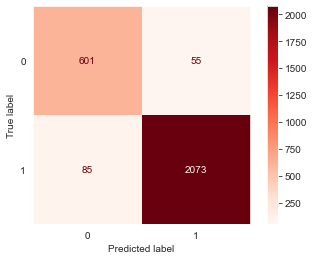

In [81]:
#to draw the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred_knn_scaled, labels=clf_knn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,  
                           display_labels=clf_knn.classes_)
disp.plot( cmap=plt.cm.Reds)
plt.grid(False)
plt.show()

In [69]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred_knn_scaled = clf_knn.predict(scaled_X_test)
target_names = ("Left","Employed")
print(classification_report(y_true, y_pred_knn_scaled, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.88      0.92      0.90       656
    Employed       0.97      0.96      0.97      2158

    accuracy                           0.95      2814
   macro avg       0.93      0.94      0.93      2814
weighted avg       0.95      0.95      0.95      2814



# SVM

In [70]:
from sklearn.svm import SVC

clf_svm = SVC()

# Train model
clf_svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = clf_svm.predict(X_test)

# Evaluate model performance
print("SVM Model Performance:")
print("Accuracy_Train:",clf_svm.score(X_train,y_train))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))





SVM Model Performance:
Accuracy_Train: 0.7778567620401635
Accuracy: 0.7850035536602701
Precision: 0.7810351067680058
Recall: 1.0
F1 Score: 0.877057508636456


In [71]:
## testing the confusion matrix

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_svm)
print('Confusion_matrix :\n{}'.format(confusion))

Confusion_matrix :
[[  51  605]
 [   0 2158]]


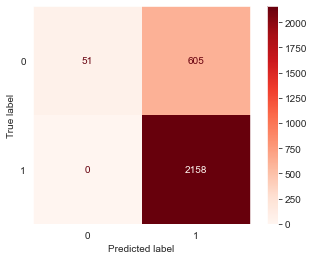

In [72]:
#to draw the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred_svm, labels=clf_svm.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,  
                           display_labels=clf_svm.classes_)
disp.plot( cmap=plt.cm.Reds)
plt.grid(False)
plt.show()

In [82]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred_svm = clf_svm.predict(X_test)
target_names = ("Left","Employed")
print(classification_report(y_true, y_pred_svm, target_names=target_names))


              precision    recall  f1-score   support

        Left       1.00      0.08      0.14       656
    Employed       0.78      1.00      0.88      2158

    accuracy                           0.79      2814
   macro avg       0.89      0.54      0.51      2814
weighted avg       0.83      0.79      0.71      2814



In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
oversampler = SMOTE(random_state = 0)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train,y_train)

In [75]:
clf_svm_smote = SVC(kernel='rbf', C=100,gamma=10)
clf_svm_smote.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_svm_smote = clf_svm_smote.predict(X_test)

# Evaluate model performance
print("SVM SMOTE Model Performance:")
print("Accuracy_Train:",clf_svm.score(X_train,y_train))
print("Accuracy:", accuracy_score(y_test, y_pred_svm_smote))
print("Precision:", precision_score(y_test, y_pred_svm_smote))
print("Recall:", recall_score(y_test, y_pred_svm_smote))
print("F1 Score:", f1_score(y_test, y_pred_svm_smote))

SVM SMOTE Model Performance:
Accuracy_Train: 0.7778567620401635
Accuracy: 0.9189765458422174
Precision: 0.9068296795952783
Recall: 0.9967562557924003
F1 Score: 0.9496688741721855


In [76]:

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_svm_smote)
print('Confusion_matrix :\n{}'.format(confusion))

Confusion_matrix :
[[ 435  221]
 [   7 2151]]


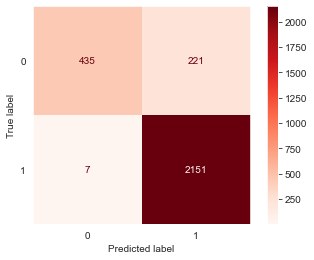

In [77]:
#to draw the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred_svm_smote, labels=clf_svm_smote.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,  
                           display_labels=clf_svm_smote.classes_)
disp.plot( cmap=plt.cm.Reds)
plt.grid(False)
plt.show()

In [78]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred_svm_smote = clf_svm_smote.predict(X_test)
target_names = ("Left","Employed")
print(classification_report(y_true, y_pred_svm_smote, target_names=target_names))

              precision    recall  f1-score   support

        Left       0.98      0.66      0.79       656
    Employed       0.91      1.00      0.95      2158

    accuracy                           0.92      2814
   macro avg       0.95      0.83      0.87      2814
weighted avg       0.92      0.92      0.91      2814

